In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from varseek.utils import calculate_metrics, create_stratified_metric_bar_plot_updated, create_venn_diagram, draw_confusion_matrix, plot_overall_metrics, create_stratified_metric_line_plot, create_benchmarking_legend, print_json

In [2]:
tools = ["varseek", "gatk_mutect2", "gatk_haplotypecaller"]  # Ensure that any additional tools have columns DP_{tool} (int ≥ 0) AND/OR mutation_detected_{tool} (bool) in {simulated_data_output_dir}/unique_mcrs_df.csv for each tool TOOL
simulated_data_output_dir = '/home/jrich/data/varseek_data_fresh/manuscript_worthy/vk_sim_2024dec17_complex_testing'  # make sure this matches notebook 2
fig2_output_dir = '/home/jrich/data/varseek_data_fresh/manuscript_worthy/fig2_output_dec17'
run_setup_notebooks = False

In [3]:
# import importlib
# import varseek.utils.visualization_utils
# importlib.reload(varseek.utils.visualization_utils)
# from varseek.utils.visualization_utils import create_stratified_metric_bar_plot_updated

# Make sure to change parameters and paths appropriately in 1_1, 2, and 2_2

# Make vk index if not created already - run notebook 1_1

In [4]:
if run_setup_notebooks and not os.path.exists("1_1_variant_detection_reference_building_fig2.ipynb"):
    run_index_creation_command = "jupyter nbconvert --to notebook --execute --output 1_1_variant_detection_reference_building_fig2.ipynb 1_1_variant_detection_reference_building.ipynb"
    subprocess.run(run_index_creation_command, shell=True)

# Create simulated data with vk sim and run variant screening with vk - 2

In [5]:
if run_setup_notebooks and not os.path.exists("2_variant_simulation_fig2.ipynb"):
    run_simulated_data_creation_and_vk_screening_command = "jupyter nbconvert --to notebook --execute --output 2_variant_simulation_fig2.ipynb 2_variant_simulation.ipynb"
    subprocess.run(run_simulated_data_creation_and_vk_screening_command, shell=True)

# Run variant calling with GATK (haplotypecaller and mutect2)

In [6]:
if run_setup_notebooks and not os.path.exists("2_2_gatk_workflow.ipynb"):
    run_simulated_data_creation_and_vk_screening_command = "jupyter nbconvert --to notebook --execute --output 2_2_gatk_workflow_fig2.ipynb 2_2_gatk_workflow.ipynb"
    subprocess.run(run_simulated_data_creation_and_vk_screening_command, shell=True)

# Generate plots for Fig 2

In [4]:
unique_mcrs_df.head()

,mcrs_header,order,distance_to_nearest_splice_junction,mcrs_sequence,mutant_sequence_rc,mcrs_id,header_list,order_list,mcrs_source,header_with_gene_name,number_of_mutations_in_this_gene_total,mcrs_header_length,mcrs_sequence_length,dlist,dlist_substring,number_of_alignments_to_normal_human_reference_cdna,number_of_alignments_to_normal_human_reference_genome,number_of_substring_matches_to_normal_human_reference_cdna,number_of_substring_matches_to_normal_human_reference_genome,number_of_alignments_to_normal_human_reference,number_of_substring_matches_to_normal_human_reference,pseudoaligned_to_human_reference_despite_not_truly_aligning,number_of_kmers_with_overlap_to_other_mcrs_items_in_mcrs_reference,overlapping_kmers,number_of_mcrs_items_with_overlapping_kmers_in_mcrs_reference,mcrs_items_with_overlapping_kmers_in_mcrs_reference,kmer_overlap_in_mcrs_reference,longest_homopolymer_length,longest_homopolymer,num_distinct_triplets,num_total_triplets,triplet_complexity,mcrs_mutation_type,concatenated_headers_in_mcrs,number_of_mutations_in_mcrs_header,mcrs_sequence_rc,entries_for_which_this_mcrs_is_substring,mcrs_is_substring,entries_for_which_this_mcrs_is_superstring,mcrs_is_superstring,mutant_sequence_read_parent,mutant_sequence_read_parent_rc,mutant_sequence_read_parent_length,wt_sequence_read_parent,wt_sequence_read_parent_rc,wt_sequence_read_parent_length,start_position_for_which_read_contains_mutation_cdna,start_position_for_which_read_contains_mutation_genome,included_in_synthetic_reads,included_in_synthetic_reads_wt,included_in_synthetic_reads_mutant,list_of_read_starting_indices_wt,list_of_read_starting_indices_mutant,number_of_reads_wt,number_of_reads_mutant,any_noisy_reads_wt,noisy_read_indices_wt,any_noisy_reads_mutant,noisy_read_indices_mutant,any_noisy_reads,tumor_purity,min_distance_to_splice_junction,DP_varseek,mutation_detected_varseek,TP_varseek,FP_varseek,FN_varseek,TN_varseek,number_of_MUTANT_reads_belonging_to_the_mcrs_item_that_aligned_somewhere,number_of_MUTANT_reads_belonging_to_the_mcrs_item_that_didnt_align_anywhere,mutation_expression_prediction_error_varseek,number_of_WT_reads_belonging_to_the_mcrs_item_that_aligned_somewhere,number_of_WT_reads_belonging_to_the_mcrs_item_that_didnt_align_anywhere,number_of_reads_belonging_to_this_mcrs_item_that_mapped_here_correctly,received_an_aligned_read_from_one_of_its_corresponding_reads,reads_mapped_to_this_reference_item,contained_any_MUTANT_reads_belonging_to_the_mcrs_item_that_aligned_somewhere,contained_any_WT_reads_belonging_to_the_mcrs_item_that_aligned_somewhere,TP_varseek_read_specific,FP_varseek_read_specific,FN_varseek_read_specific,TN_varseek_read_specific,number_of_reads_belonging_to_this_mcrs_item_that_did_not_align_correctly,number_of_reads_aligned_to_this_mcrs_item_that_aligned_incorrectly,DP_gatk_mutect2,DP_gatk_haplotypecaller,mutation_detected_gatk_mutect2,mutation_expression_prediction_error_gatk_mutect2,TP_gatk_mutect2,FP_gatk_mutect2,FN_gatk_mutect2,TN_gatk_mutect2,mutation_detected_gatk_haplotypecaller,mutation_expression_prediction_error_gatk_haplotypecaller,TP_gatk_haplotypecaller,FP_gatk_haplotypecaller,FN_gatk_haplotypecaller,TN_gatk_haplotypecaller
0,ENST00000000233:c.161C>A,0,60.0,CCAGCCCGCACCCCGCGTCGGTGCCCGCGCCCCTCCCCGGGCCCCG...,GAATCCGCATCTGCTTCTTCCCGAAGATCCGCGAAAAGAGCGCGGA...,vcrs_4584647,['ENST00000000233:c.161C>A'],[0],cdna,ENST00000000233(ARF5):c.161C>A,81,24,109,none,none,0,0,0,0,0,0,NaN,0,set(),0,set(),False,4,"['CCCC', 'TTTT']",40,107,0.373832,substitution,False,1,GAATCCGCATCTGCTTCTTCCCGAAGATCCGCGAAAAGAGCGCGGA...,NaN,False,NaN,False,CGGTGACGTCGGGAGGGCAGCGACGCGCGGAGGCGGCGGCGGAGCC...,AAGCCTATGGTTGGGATGGTGGTGACAATCTCCCCCAACTTCAGTT...,291.0,CGGTGACGTCGGGAGGGCAGCGACGCGCGGAGGCGGCGGCGGAGCC...,AAGCCTATGGTTGGGATGGTGGTGACAATCTCCCCCAACTTCAGTT...,291.0,12,127228410.0,False,False,False,0,0,0.0,0.0,False,0,False,0,False,NaN,NaN,NaN,False,False,False,False,True,0,0.0,NaN,0,0.0,0.0,False,[],False,False,False,False,False,True,0.0,NaN,NaN,NaN,False

In [3]:
os.makedirs(fig2_output_dir, exist_ok=True)

unique_mcrs_df_path = os.path.join(simulated_data_output_dir, 'unique_mcrs_df_with_gatk.csv')
unique_mcrs_df = pd.read_csv(unique_mcrs_df_path)
unique_mcrs_df.columns = unique_mcrs_df.columns.str.replace("_vk", "_varseek", regex=False)  # replace _vk with _varseek

read_df_path = os.path.join(simulated_data_output_dir, 'synthetic_reads_updated.csv')
read_df = pd.read_csv(read_df_path)

/tmp/ipykernel_48011/2616496411.py:4: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  unique_mcrs_df = pd.read_csv(unique_mcrs_df_path)


In [4]:
metric_dictionary_reads_vk = calculate_metrics(read_df, header_name = "read_header", suffix="", out = f"{fig2_output_dir}/read_metrics_varseek.txt")
draw_confusion_matrix(metric_dictionary_reads_vk, suffix="")
# create_stratified_metric_bar_plot(read_df, 'mcrs_mutation_type', 'accuracy', overall_metric = metric_dictionary_reads['accuracy'], log_x_axis = False, display_numbers = True, out_path = f"{fig2_output_dir}/accuracy_vs_mcrs_mutation_type_read_perspective.pdf")

TP: 15402972, FP: 13109, FN: 237828, TN: 14520491
Accuracy: 0.9916837783021369, Sensitivity: 0.9847943839189811, Specificity: 0.9990980211372268


                      Confusion Matrix                       
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │      15402972      │       237828       │
│ Actual Negative │       13109        │      14520491      │
└─────────────────┴────────────────────┴────────────────────┘

In [5]:
# #!!! TEMP random data for testing
# import random
# random.seed(42)

# # Define the number of rows
# num_rows = 500  # Number of rows for the DataFrame

# # Generate unique mcrs_id values
# mcrs_ids = [f"mcrs_{i}" for i in range(1, num_rows + 1)]

# # Define the column names
# columns = [
#     "mcrs_id",
#     "mcrs_header",
#     "TP_varseek",
#     "FP_varseek",
#     "TN_varseek",
#     "FN_varseek",
#     "TP_gatk_mutect2",
#     "FP_gatk_mutect2",
#     "TN_gatk_mutect2",
#     "FN_gatk_mutect2",
#     "TP_gatk_haplotypecaller",
#     "FP_gatk_haplotypecaller",
#     "TN_gatk_haplotypecaller",
#     "FN_gatk_haplotypecaller",
#     "mcrs_mutation_type",
#     "kmer_overlap_in_mcrs_reference",
#     "distance_to_nearest_splice_junction",
#     "is_near_splice_junction_10",
#     "triplet_complexity",
#     "longest_homopolymer_length",
#     "any_noisy_reads",
#     "tumor_purity",
#     "number_of_reads_mutant",
#     "number_of_reads_wt",
#     "mutation_expression_prediction_error_varseek",
#     "mutation_expression_prediction_error_gatk_haplotypecaller",
#     "mutation_expression_prediction_error_gatk_mutect2",
#     "included_in_synthetic_reads_mutant",
#     "mutation_detected_varseek",
#     "mutation_detected_gatk_mutect2",
#     "mutation_detected_gatk_haplotypecaller"
# ]

# # Generate random data for the DataFrame
# data = []
# mcrs_mutation_types = ["substitution", "insertion", "deletion", "delins", "duplication", "inversion", "mixed"]
# mutant_sequencing_depth = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]
# wt_sequencing_depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]

# for mcrs_id in mcrs_ids:
#     selected_varseek = random.choice(["TP", "FP", "TN", "FN"])
#     if selected_varseek == "TP" or selected_varseek == "FN":
#         selected_gatk_mutect2 = random.choice(["TP", "FN"])
#         selected_gatk_haplotypecaller = random.choice(["TP", "FN"])
#     else:
#         selected_gatk_mutect2 = random.choice(["FP", "TN"])
#         selected_gatk_haplotypecaller = random.choice(["FP", "TN"])
#     if selected_varseek == "TP" or selected_varseek == "FP":
#         mutation_detected_varseek = True
#     else:
#         mutation_detected_varseek = False
#     if selected_gatk_mutect2 == "TP" or selected_gatk_mutect2 == "FP":
#         mutation_detected_gatk_mutect2 = True
#     else:
#         mutation_detected_gatk_mutect2 = False
#     if selected_gatk_haplotypecaller == "TP" or selected_gatk_haplotypecaller == "FP":
#         mutation_detected_gatk_haplotypecaller = True
#     else:
#         mutation_detected_gatk_haplotypecaller = False
#     number_of_mutant_reads = random.choice(mutant_sequencing_depth)
    
#     row = [
#         mcrs_id,
#         mcrs_id + "_header",
#         selected_varseek == "TP",  # TP_varseek
#         selected_varseek == "FP",  # FP_varseek
#         selected_varseek == "TN",  # TN_varseek
#         selected_varseek == "FN",  # FN_varseek
#         selected_gatk_mutect2 == "TP",  # TP_gatk_mutect2
#         selected_gatk_mutect2 == "FP",  # FP_gatk_mutect2
#         selected_gatk_mutect2 == "TN",  # TN_gatk_mutect2
#         selected_gatk_mutect2 == "FN",  # FN_gatk_mutect2
#         selected_gatk_haplotypecaller == "TP",  # TP_gatk_haplotypecaller
#         selected_gatk_haplotypecaller == "FP",  # FP_gatk_haplotypecaller
#         selected_gatk_haplotypecaller == "TN",  # TN_gatk_haplotypecaller
#         selected_gatk_haplotypecaller == "FN",  # FN_gatk_haplotypecaller
#         random.choice(mcrs_mutation_types),  # mcrs_mutation_type
#         random.choice([True, False]),  # kmer_overlap_in_mcrs_reference
#         random.randint(0, 100),  # distance_to_nearest_splice_junction
#         random.choice([True, False]),  # is_near_splice_junction_10
#         round(random.uniform(0, 1), 3),  # triplet_complexity
#         random.randint(0, 20),  # longest_homopolymer_length
#         random.choice([True, False]),  # any_noisy_reads
#         round(random.uniform(0, 1), 1),  # tumor_purity
#         number_of_mutant_reads,  # number_of_reads_mutant
#         random.choice(wt_sequencing_depth),  # number_of_reads_wt
#         random.randint(-100, 100),  # mutation_expression_prediction_error_varseek
#         random.randint(-100, 100),  # mutation_expression_prediction_error_gatk_haplotypecaller
#         random.randint(-100, 100),  # mutation_expression_prediction_error_gatk_mutect2
#         number_of_mutant_reads > 0,  # included_in_synthetic_reads_mutant
#         mutation_detected_varseek,  # mutation_detected_varseek
#         mutation_detected_gatk_mutect2,  # mutation_detected_gatk_mutect2
#         mutation_detected_gatk_haplotypecaller  # mutation_detected_gatk_haplotypecaller
#     ]
#     data.append(row)

# # Create the DataFrame
# unique_mcrs_df = pd.DataFrame(data, columns=columns)

In [6]:
# Ensure that any additional tools have columns DP_{tool} (int ≥ 0) in {simulated_data_output_dir}/unique_mcrs_df.csv for each tool TOOL
if 'included_in_synthetic_reads_mutant' not in unique_mcrs_df.columns:
    unique_mcrs_df['included_in_synthetic_reads_mutant'] = unique_mcrs_df['number_of_reads_mutant'] > 0

for tool in tools:
    assert f'DP_{tool}' in unique_mcrs_df.columns or f'mutation_detected_{tool}' in unique_mcrs_df.columns, f"DP_{tool} or mutation_detected_{tool} must be in unique_mcrs_df.columns"
    if f'mutation_detected_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'mutation_detected_{tool}'] = unique_mcrs_df[f'DP_{tool}'] > 0
    if f'TP_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'TP_{tool}'] = (unique_mcrs_df['included_in_synthetic_reads_mutant'] & unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'TN_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'TN_{tool}'] = (~unique_mcrs_df['included_in_synthetic_reads_mutant'] & ~unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'FP_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'FP_{tool}'] = (~unique_mcrs_df['included_in_synthetic_reads_mutant'] & unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'FN_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'FN_{tool}'] = (unique_mcrs_df['included_in_synthetic_reads_mutant'] & ~unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'mutation_expression_prediction_error_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'mutation_expression_prediction_error_{tool}'] = unique_mcrs_df[f'DP_{tool}'] - unique_mcrs_df['number_of_reads_mutant']

In [7]:
metric_dict_collection = OrderedDict()
for tool in tools:
    print(tool)
    metric_dict_collection[tool] = calculate_metrics(unique_mcrs_df, header_name = "mcrs_header", suffix=f"_{tool}", out = f"{fig2_output_dir}/reference_metrics_{tool}.txt")
    draw_confusion_matrix(metric_dict_collection[tool], title = f"Confusion Matrix for {tool}")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

varseek
TP: 380274, FP: 12866, FN: 1005, TN: 4857516
Accuracy: 0.9973587404061306, Sensitivity: 0.9973641349248188, Specificity: 0.9973583180949667
Mean Expression Error: -0.5050363738108562, Median Expression Error: 0.0, Mean Magnitude Expression Error: 0.5795645317189805, Median Magnitude Expression Error: 0.0


                Confusion Matrix for varseek                 
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │       380274       │        1005        │
│ Actual Negative │       12866        │      4857516       │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------
gatk_mutect2
TP: 205299, FP: 1549, FN: 175980, TN: 4868833
Accuracy: 0.9661956474342117, Sensitivity: 0.5384482229548441, Specificity: 0.9996819551320615
Mean Expression Error: 147.54681310943107, Median Expression Error: 63.0, Mean Magnitude Expression Error: 160.81989691629093, Median Magnitude Expression Error: 72.0


              Confusion Matrix for gatk_mutect2              
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │       205299       │       175980       │
│ Actual Negative │        1549        │      4868833       │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------
gatk_haplotypecaller
TP: 130490, FP: 3341, FN: 250789, TN: 4867041
Accuracy: 0.9516095955165423, Sensitivity: 0.3422428195625775, Specificity: 0.9993140168471385
Mean Expression Error: 83.51149156430145, Median Expression Error: 31.0, Mean Magnitude Expression Error: 103.2407795853077, Median Magnitude Expression Error: 43.0


          Confusion Matrix for gatk_haplotypecaller          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │       130490       │       250789       │
│ Actual Negative │        3341        │      4867041       │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------


# Create legend

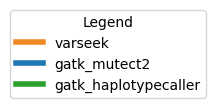

In [8]:
create_benchmarking_legend(tools, f"{fig2_output_dir}/legend.pdf")

# Bar plot of various metrics

In [22]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import plot_overall_metrics

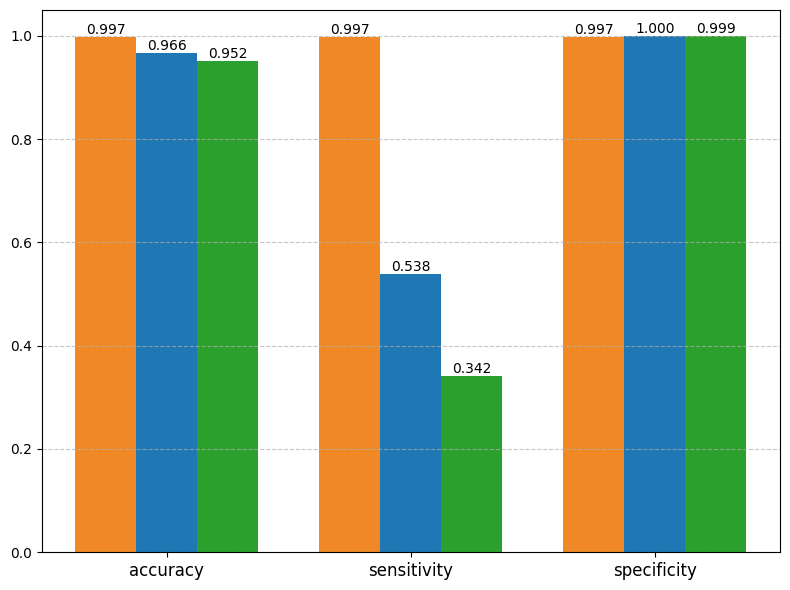

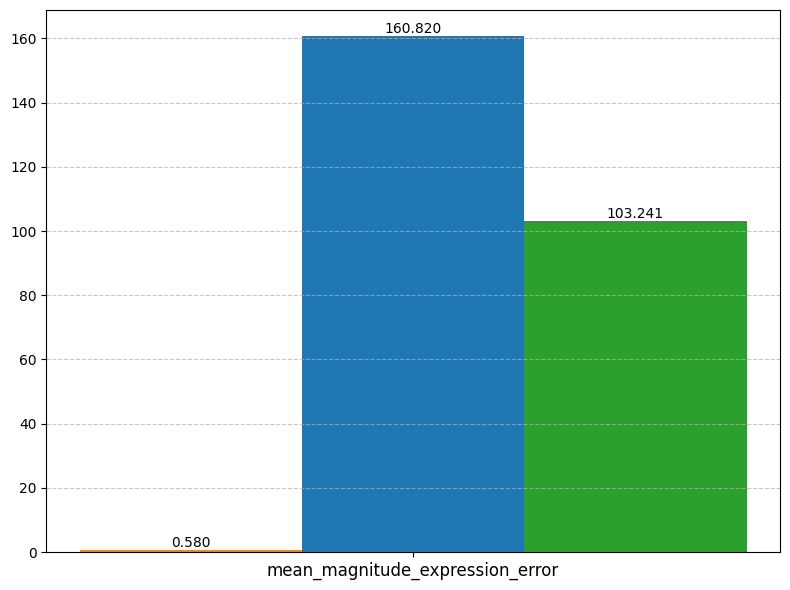

In [23]:
# plot_overall_metrics(metric_dict_collection, primary_metrics = ["accuracy", "sensitivity", "specificity"], secondary_metric = "mean_magnitude_expression_error", display_numbers=True, output_file = f"{fig2_output_dir}/overall_metrics.pdf")
plot_overall_metrics(metric_dict_collection, primary_metrics = ["accuracy", "sensitivity", "specificity"], display_numbers=True, show_p_values = False, unique_mcrs_df = unique_mcrs_df, output_file = f"{fig2_output_dir}/overall_metrics_acc_sens_spec.pdf", output_file_p_values = f"{fig2_output_dir}/overall_metrics_acc_sens_spec_p_values.json", bonferroni=True)  # to plot in separate plots
# print_json(f"{fig2_output_dir}/overall_metrics_acc_sens_spec_p_values.json")

plot_overall_metrics(metric_dict_collection, primary_metrics = "mean_magnitude_expression_error", display_numbers=True, show_p_values = False, unique_mcrs_df = unique_mcrs_df, output_file = f"{fig2_output_dir}/overall_metrics_error.pdf", output_file_p_values = f"{fig2_output_dir}/overall_metrics_expression_error_p_values.json", bonferroni=True, filter_real_negatives = True)  # to plot in separate plots
# print_json(f"{fig2_output_dir}/overall_metrics_expression_error_p_values.json")

# Stratified metric line plot of all 3 methods: sensitivity vs mutant read depth

In [11]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_line_plot

In [13]:
from varseek.utils import safe_literal_eval

unique_mcrs_df["list_of_read_starting_indices_mutant_temp"] = unique_mcrs_df["list_of_read_starting_indices_mutant"].apply(safe_literal_eval)

unique_mcrs_df['number_of_reads_mutant'] = unique_mcrs_df['list_of_read_starting_indices_mutant_temp'].apply(
        lambda x: len(x) if isinstance(x, list) else 0
)

unique_mcrs_df.drop(columns=["list_of_read_starting_indices_mutant_temp"], inplace=True)

unique_mcrs_df['mutation_expression_prediction_error_varseek'] = unique_mcrs_df['DP_varseek'] - unique_mcrs_df['number_of_reads_mutant']  # positive means overpredicted, negative means underpredicted
unique_mcrs_df['mutation_expression_prediction_error_gatk_mutect2'] = unique_mcrs_df['DP_gatk_mutect2'] - unique_mcrs_df['number_of_reads_mutant']  # positive means overpredicted, negative means underpredicted
unique_mcrs_df['mutation_expression_prediction_error_gatk_haplotypecaller'] = unique_mcrs_df['DP_gatk_haplotypecaller'] - unique_mcrs_df['number_of_reads_mutant']  # positive means overpredicted, negative means underpredicted

unique_mcrs_df['tumor_purity'] = unique_mcrs_df['number_of_reads_mutant'] / (unique_mcrs_df['number_of_reads_wt'] + unique_mcrs_df['number_of_reads_mutant'])

unique_mcrs_df['tumor_purity'] = np.where(
    np.isnan(unique_mcrs_df['tumor_purity']), 
    np.nan,  # Keep NaN as NaN
    unique_mcrs_df['tumor_purity']  # Keep the result for valid divisions
)

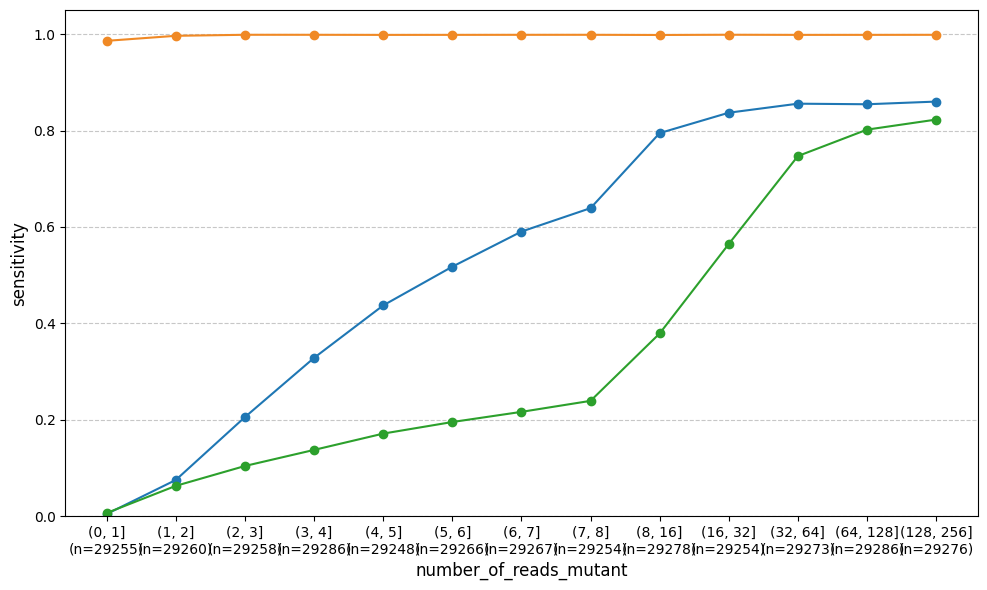

In [17]:
x_stratification = "number_of_reads_mutant"
y_metric = "sensitivity"
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, float('inf')]  # start at 1 because 0 values are automatically removed with y_metric = "sensitivity"
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt", filter_real_negatives = True)

# Stratified metric line plot of all 3 methods: sensitivity vs tumor purity

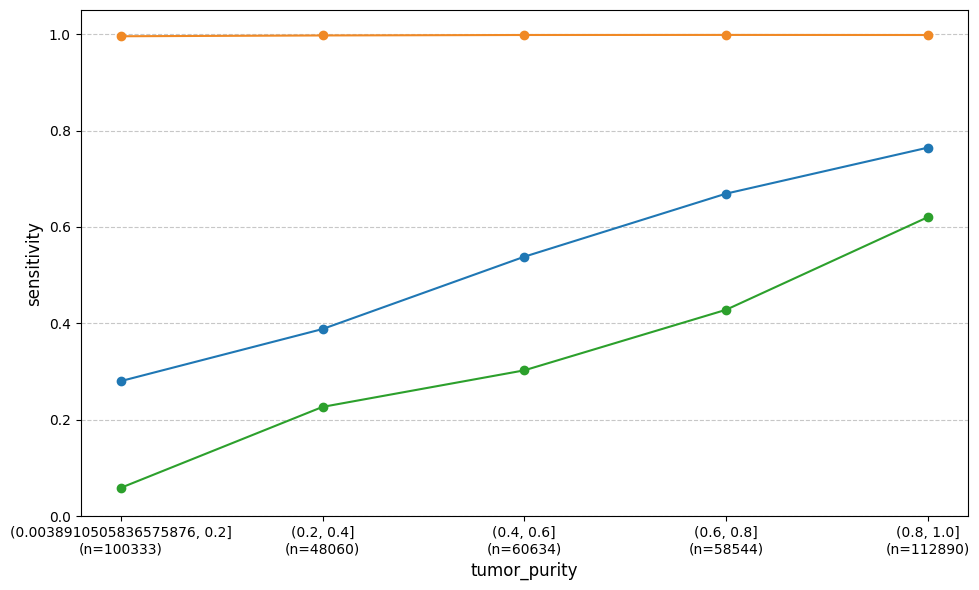

In [25]:
x_stratification = "tumor_purity"
y_metric = "sensitivity"
bins = [-float('inf'), 0.2, 0.4, 0.6, 0.8, float('inf')]  # bins = None  # bins = [0, 0.25, 0.5, 0.75, 1]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["(0, 0.25]", "(0.25, 0.5]", "(0.5, 0.75]", "(0.75, 1]"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: mean_magnitude_expression_error vs mutant sequencing depth

In [6]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_line_plot

In [7]:
unique_mcrs_df_head = unique_mcrs_df.head(1000)

In [ ]:
x_stratification = "number_of_reads_mutant"
y_metric = "mean_magnitude_expression_error"  # mean_magnitude_expression_error or mean_expression_error

#!!!!! SHOULD BE FALSE
filter_real_negatives = False  # set this to True when y_metric is expression error for all cases besides x_stratification = "number_of_reads_mutant", as we are not interested in the vast majority of cases that are real 0 and predicted 0
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, filter_real_negatives = filter_real_negatives, show_p_values = False, show_confidence_intervals = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: sensitivity vs mutation type

In [46]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_bar_plot_updated

In [ ]:
x_stratification = "mcrs_mutation_type"
y_metric = "sensitivity"
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: specificity vs mutation type

In [ ]:
x_stratification = "mcrs_mutation_type"
y_metric = "specificity"
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: mean mutation expression error vs mutation type

In [ ]:
x_stratification = "mcrs_mutation_type"
y_metric = "mean_magnitude_expression_error"  # mean_magnitude_expression_error or mean_expression_error
filter_real_negatives = True
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, filter_real_negatives = filter_real_negatives, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: sensitivity vs splice distance

In [ ]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_line_plot

x_stratification = "distance_to_nearest_splice_junction"
y_metric = "sensitivity"
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["[0, 0.25)", "[0.25, 0.5)", "[0.5, 0.75)", "[0.75, 1)"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: specificity vs splice distance

In [ ]:
x_stratification = "distance_to_nearest_splice_junction"
y_metric = "specificity"
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["[0, 0.25)", "[0.25, 0.5)", "[0.5, 0.75)", "[0.75, 1)"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")